In [1]:
import os
import json
import re
import glob
from collections import defaultdict

import numpy as np
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt

In [2]:
results_json = json.load(open('/home/Nele/code/ct_classifier_zoops/runs/Jan21_14-55-37_cv4e-2026-student4/val_predictions/val_predictions_epoch_00164.json'))
results_json.keys()
gt = results_json['labels']
predictions = results_json['predictions']
confidences = results_json['confidences']
labels = np.unique(gt)
labels.sort()
precision = precision_score(gt, predictions, labels=labels, average=None, zero_division=0)
recall = recall_score(gt, predictions, labels=labels, average=None, zero_division=0)


In [3]:
results_json['confidences']

[0.8129960894584656,
 0.6988049149513245,
 0.48138073086738586,
 0.8446241021156311,
 0.9346411228179932,
 0.9147233963012695,
 0.896722137928009,
 0.7582504153251648,
 0.8492298722267151,
 0.5874818563461304,
 0.9388467669487,
 0.7304707765579224,
 0.9949926733970642,
 0.5394050478935242,
 0.6799549460411072,
 0.962577760219574,
 0.9556108117103577,
 0.7148742079734802,
 0.9646580815315247,
 0.9871944785118103,
 0.971606433391571,
 0.848770260810852,
 0.9997511506080627,
 0.9999963045120239,
 0.972577691078186,
 0.8782796859741211,
 0.7048302888870239,
 0.6274609565734863,
 0.9612086415290833,
 0.9504818916320801,
 0.9977070093154907,
 0.9655519127845764,
 0.9999582767486572,
 0.996129035949707,
 0.9658257365226746,
 0.9996895790100098,
 0.991315484046936,
 0.9999889135360718,
 0.9849728345870972,
 0.9999997615814209,
 0.9999734163284302,
 0.9999878406524658,
 0.9998857975006104,
 0.9995088577270508,
 0.3543999195098877,
 0.9989690780639648,
 0.9963551759719849,
 0.9999961853027344,
 

Text(0.5, 0, 'class label')

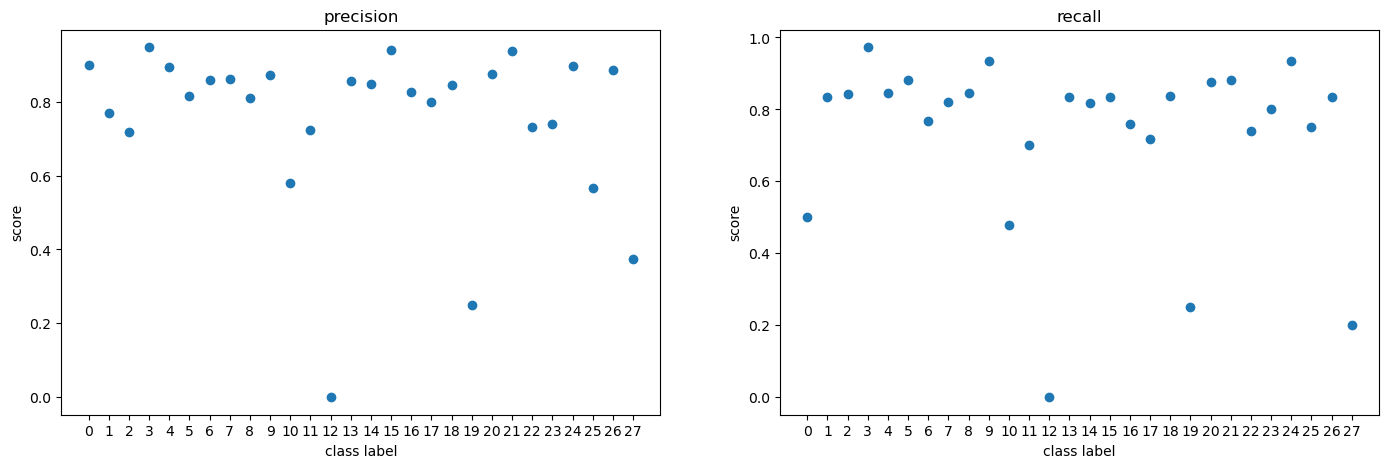

In [4]:
plt.figure(figsize=(17,5))
plt.subplot(1,2,1) 
plt.scatter(labels,precision,label='precision')
plt.xticks(labels)
plt.title('precision')
plt.ylabel('score')
plt.xlabel('class label')
plt.subplot(1,2,2)
plt.scatter(labels,recall,label='recall')
plt.xticks(labels)
plt.title('recall')
plt.ylabel('score')
plt.xlabel('class label')

Text(0.5, 0, 'class label')

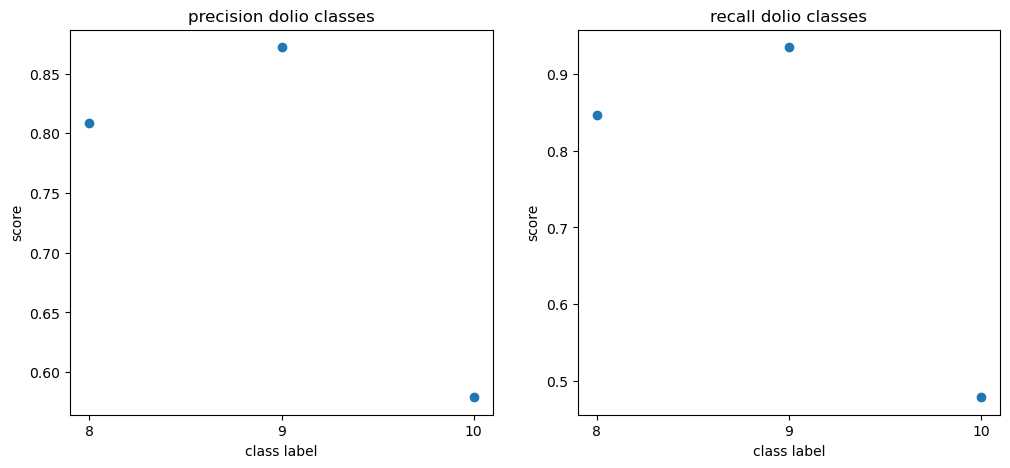

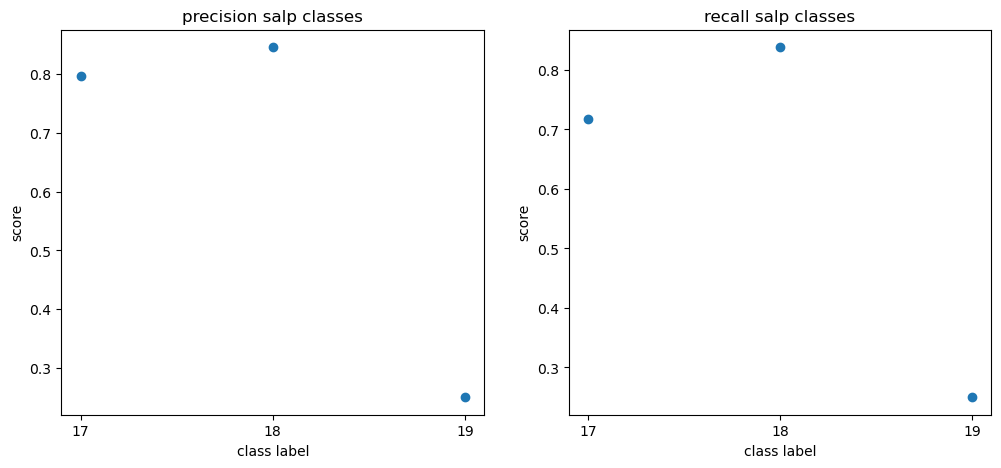

In [5]:
# # look at classes 
#     "dolio": 8,
#     "dolnurse": 9,
#     "dolphor": 10,
# separately

plt.figure(figsize=(12,5))
plt.subplot(1,2,1) 
plt.scatter([8,9,10],precision[[8,9,10]],label='precision')
plt.xticks([8,9,10])
plt.title('precision dolio classes')
plt.ylabel('score')
plt.xlabel('class label')
plt.subplot(1,2,2)
plt.scatter([8,9,10],recall[[8,9,10]],label='recall')
plt.xticks([8,9,10])
plt.title('recall dolio classes')
plt.ylabel('score')
plt.xlabel('class label')

# # look at classes 
#     "salp": 17,
#     "salpchain": 18,
#     "salpring": 19,
# separately

plt.figure(figsize=(12,5))
plt.subplot(1,2,1) 
plt.scatter([17,18,19],precision[[17,18,19]],label='precision')
plt.xticks([17,18,19])
plt.title('precision salp classes')
plt.ylabel('score')
plt.xlabel('class label')
plt.subplot(1,2,2)
plt.scatter([17,18,19],recall[[17,18,19]],label='recall')
plt.xticks([17,18,19])
plt.title('recall salp classes')
plt.ylabel('score')
plt.xlabel('class label')
    

In [6]:
translate_labels = {8:28, 9:28,10:28, 17:29, 18:29, 19:29}
gt_translated = np.array([translate_labels[label] if label in translate_labels.keys() else label for label in gt])
pred_translated = np.array([translate_labels[label] if label in translate_labels.keys() else label for label in predictions])
labels_translated = np.unique(gt_translated)
labels_translated.sort()
precision = precision_score(gt_translated, pred_translated, labels=labels_translated, average=None, zero_division=0)
recall = recall_score(gt_translated, pred_translated, labels=labels_translated, average=None, zero_division=0)

In [15]:
np.unique(np.array(gt)),np.unique(np.array(gt_translated))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7, 11, 12, 13, 14, 15, 16, 20, 21, 22,
        23, 24, 25, 26, 27, 28, 29]))

Text(0.5, 0, 'class label')

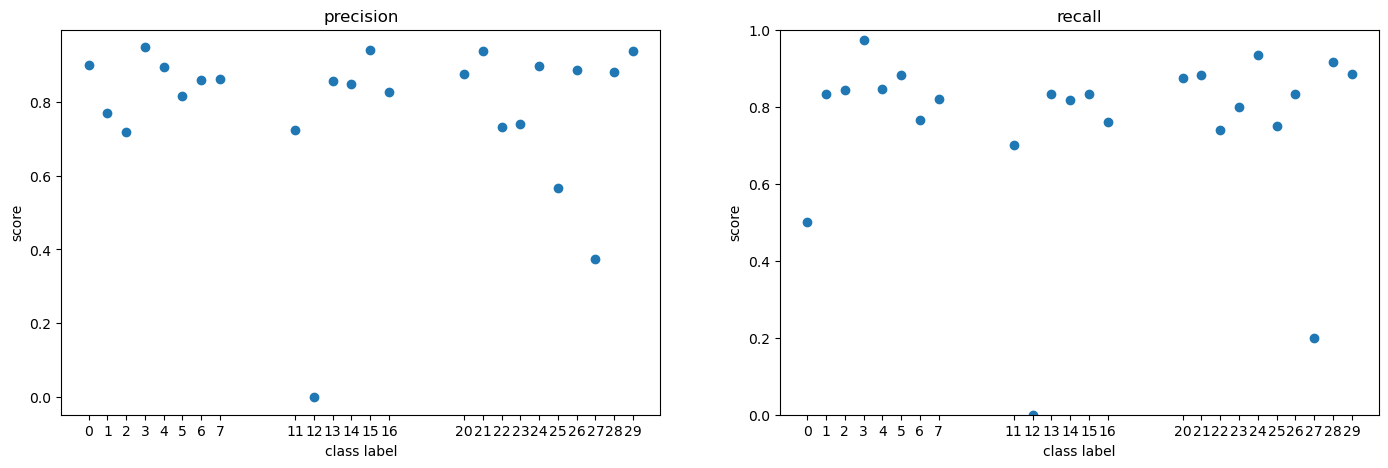

In [7]:
plt.figure(figsize=(17,5))
plt.subplot(1,2,1) 
plt.scatter(labels_translated,precision,label='precision')
plt.xticks(labels_translated)
plt.title('precision')
plt.ylabel('score')
plt.xlabel('class label')
plt.subplot(1,2,2)
plt.scatter(labels_translated,recall,label='recall')
plt.xticks(labels_translated)
plt.ylim(0, 1)
plt.title('recall')
plt.ylabel('score')
plt.xlabel('class label')

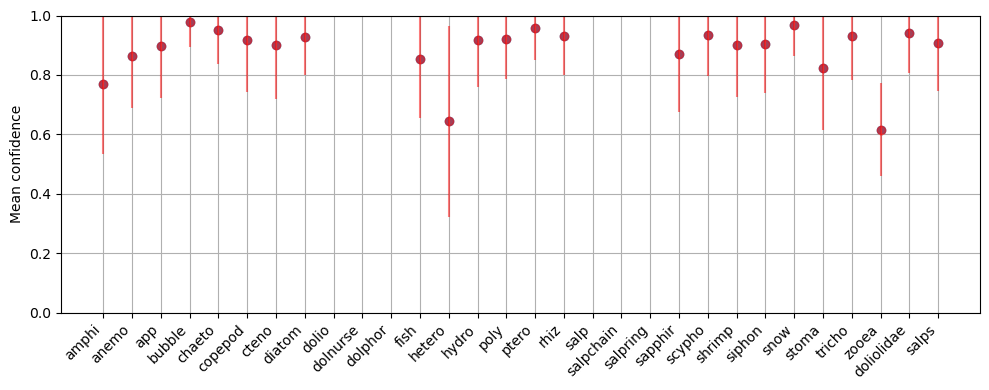

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Mean confidence for each true class
conf_arr = np.array(confidences)
pred = np.array(pred_translated)
category_dict = json.load(open("/home/Nele/code/scripts/DataPrep_Classifier/category_dict.json", 'r'))
inverse_category_dict = {v: k for k, v in category_dict.items()}
inverse_category_dict[28] = "doliolidae"
inverse_category_dict[29] = "salps"
class_ids = sorted(inverse_category_dict.keys())
class_names = [inverse_category_dict[c] for c in class_ids]
mean_conf_true = [conf_arr[pred == c].mean() if (pred == c).any() else np.nan for c in class_ids]
std_conf_true = [conf_arr[pred == c].std() if (pred == c).any() else np.nan for c in class_ids]

plt.figure(figsize=(10, 4))
plt.scatter(class_ids, mean_conf_true, color="steelblue")
plt.errorbar(class_names, mean_conf_true, yerr=std_conf_true, fmt="o", color="red", alpha=0.5)
#plt.title(f"Mean confidence by class ep:{ep_num_str}")
plt.ylabel("Mean confidence")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1)
plt.grid(axis="y")
plt.grid(axis="x")
plt.tight_layout()
plt.show()